# Denosing Diffusion Models

Training custom implementation of DDPM on MNIST dataset.

### Preparation

First, let's clone the repository, which contains all the necessary functions.

In [ ]:
!git clone https://github.com/huwarr/ddpm.git

In [ ]:
%cd ddpm

Now it's time to install dependencies.

In [ ]:
%pip install -r requirements.txt

Import everything we will use further.

In [22]:
# Import training and sampling functions from repository,
# as well as the model definition
from train import train_func
from sample import sample_func
from model import UNet

# Import libraries
import torch
import wandb
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

### Training

One epoch of training on MNIST dataset with batch size 128 takes 469 steps.

The authors of the paper trained there model for 800k steps on CIFAR. For the sake of saving our time, let's train our model for approximately 46k steps - this should be enough to achieve some prominent results.

In [ ]:
# For reproducibility reasons, let's fix torch seed before initializing the model
torch.manual_seed(42)
# Let's use small dropout to leverage overfitting, but not interfere with the training process
ddpm = UNet(dropout=0.1)

# Define wandb run for pretty logging
wandb.login(key='<key>')
wandb.init(project='ddpm')

# Finally, train the model
losses = train_func(ddpm, n_epochs=100, use_wandb=True, sample_during_training=True)

# Cell output was cleared because it's too long

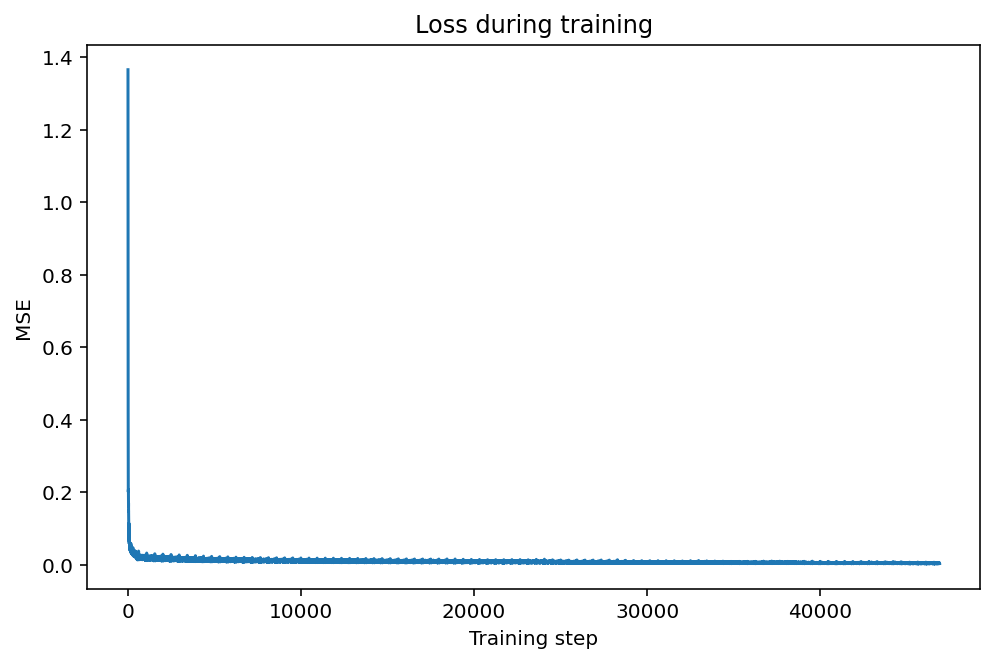

Loss: 0.003740748157724738


In [24]:
plt.figure(figsize=(8, 5))
plt.plot(losses)
plt.title("Loss during training")
plt.xlabel('Training step')
plt.ylabel('MSE')
plt.show()
print('Loss: {}'.format(losses[-1]))

It is pretty obvious, that we could use some more training time and train our model untill convergence. However, further we will see that even with such loss our model generates good samples.

### Sampling

Let's generate a couple of examples to see, how well our model is doing.

In [25]:
samples, steps = sample_func(ddpm, n_samples=10, use_wandb=False)

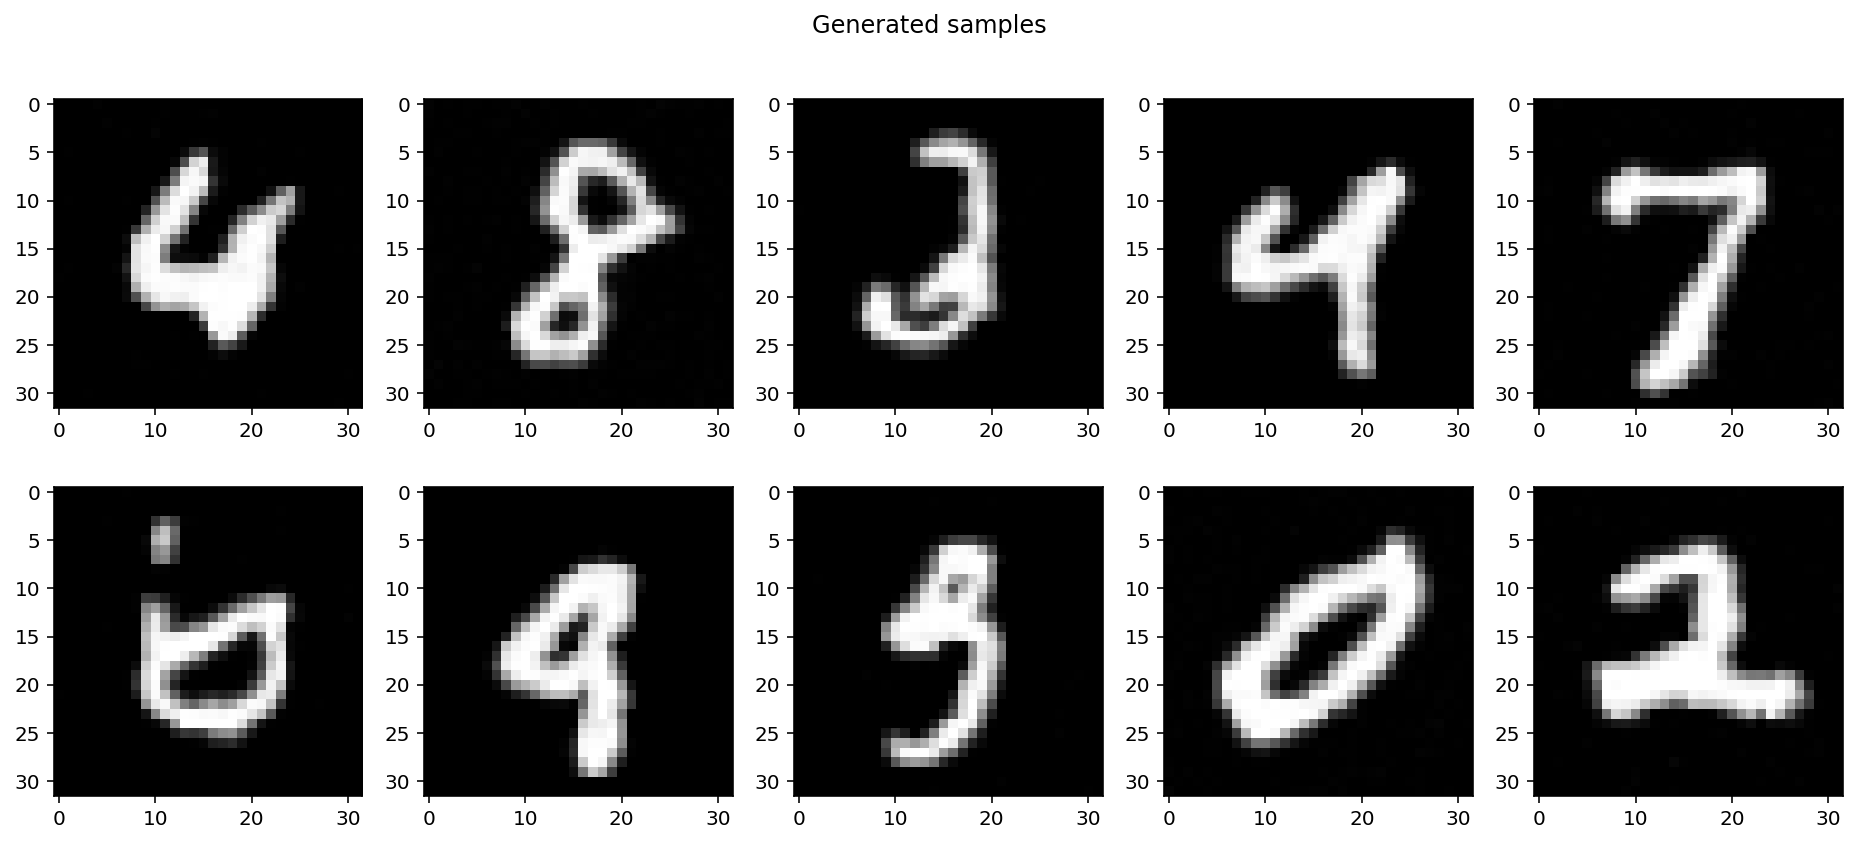

In [26]:
fig, axs = plt.subplots(2, 5, figsize=[13, 6])
fig.suptitle("Generated samples")
for i in range(len(samples)):
    axs[i % 2, i % 5].imshow(samples[i].squeeze().numpy(), cmap='gray')
plt.tight_layout()

Of course, the generated digits don't look their best right now, but we can recognize each of them!

I think, we could have achieved better results in a short time with using guidance with classification labels.

Let's also look at the example of reverse diffusion process: we take a sample on every 200th step of denosing.

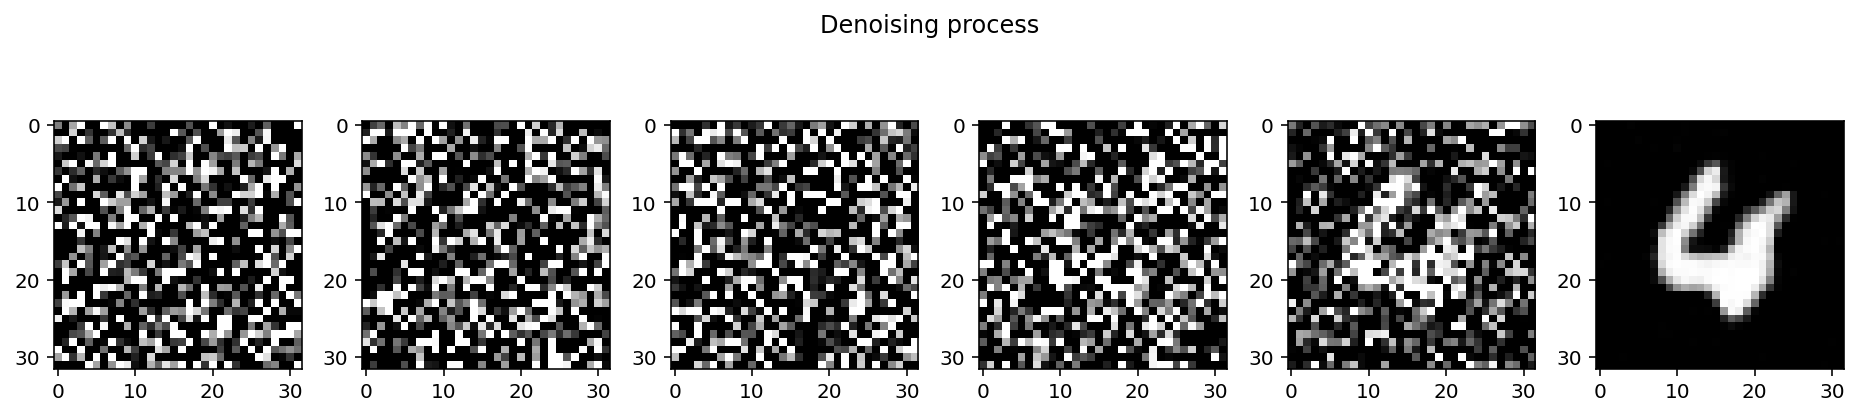

In [27]:
fig, axs = plt.subplots(1, len(steps), figsize=[13, 3])
fig.suptitle("Denoising process")
for i in range(len(steps)):
    axs[i].imshow(steps[i].squeeze().numpy(), cmap='gray')
plt.tight_layout()

All done! Don't forget to finish the wandb run.

In [28]:
wandb.finish()

train loss,██▇▄▇▆▇▅▅▅▅▄▄▄▄▂▃▃▄▃▃▃▃▄▂▃▂▂▂▂▂▂▂▂▁▁▂▂▁▂
train loss,0.00374


### Chekpoint

Finally, let's save a chekpoint of our trained model.

In [29]:
torch.save(ddpm.state_dict(), 'ddpm_trained.pt')